## Importing Libraries.


In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)
# print(os.listdir("../input"))


## Data Exploration


In [173]:
df = pd.read_csv("Clustering Data with AandE.csv")
df.head()


,Org_Code,Effective_Snapshot_Date,All_specialties:_Non-Elective,All_specialties:_Ordinary_Elective,SUM_Non_Elective_and_Ordinary_Elective,All_specialties:_Daycase_Elective,Total_HC,Total_FTE,AandE Attends Type1,Total AandE Attends
0,RPC,44985,495.0,215.0,710.0,950.0,1104,935.20,0.0,1287.0
1,RC9,44985,7170.0,835.0,8005.0,5415.0,8246,7486.10,13737.0,20963.0
2,RGT,44985,3760.0,1005.0,4765.0,6210.0,11743,10853.61,9354.0,14693.0
3,RY9,44985,40.0,0.0,40.0,0.0,1287,1091.21,0.0,4565.0
4,RWH,44985,3475.0,405.0,3880.0,5370.0,6534,5845.72,8492.0,13285.0


In [93]:
df.shape


(174, 10)

In [84]:
df.describe()


,Effective_Snapshot_Date,All_specialties:_Non-Elective,All_specialties:_Ordinary_Elective,SUM_Non_Elective_and_Ordinary_Elective,All_specialties:_Daycase_Elective,Total_HC,Total_FTE,AandE_Attends_Type1
count,174.0,172.000000,167.000000,170.000000,173.000000,174.000000,174.000000,105.000000
mean,44985.0,3647.674419,537.305389,4218.411765,3194.104046,7074.850575,6279.712299,9824.247619
std,0.0,2943.648450,520.393372,3311.397407,2719.426224,4552.570031,4117.421823,4450.612702
min,44985.0,0.000000,0.000000,40.000000,0.000000,1104.000000,935.200000,3590.000000
25%,44985.0,387.500000,202.500000,756.250000,815.000000,4195.250000,3607.990000,7076.000000
50%,44985.0,3782.500000,400.000000,4235.000000,2710.000000,6105.000000,5369.550000,8770.000000
75%,44985.0,5683.750000,782.500000,6456.250000,4835.000000,8918.250000,7747.037500,11384.000000
max,44985.0,14695.000000,2985.000000,16605.000000,11545.000000,28528.000000,25871.940000,26836.000000


In [94]:
df.dtypes


Org_Code                                   object
Effective_Snapshot_Date                     int64
All_specialties:_Non-Elective             float64
All_specialties:_Ordinary_Elective        float64
SUM_Non_Elective_and_Ordinary_Elective    float64
All_specialties:_Daycase_Elective         float64
Total_HC                                    int64
Total_FTE                                 float64
AandE Attends Type1                       float64
Total AandE Attends                       float64
dtype: object

In [95]:
df.columns

Index(['Org_Code', 'Effective_Snapshot_Date', 'All_specialties:_Non-Elective',
       'All_specialties:_Ordinary_Elective',
       'SUM_Non_Elective_and_Ordinary_Elective',
       'All_specialties:_Daycase_Elective', 'Total_HC', 'Total_FTE',
       'AandE Attends Type1', 'Total AandE Attends'],
      dtype='object')

In [174]:
features = ["Org_Code",
       'SUM_Non_Elective_and_Ordinary_Elective',
    'All_specialties:_Non-Elective',
       'All_specialties:_Ordinary_Elective',
       'All_specialties:_Daycase_Elective', 'Total_HC', 'Total_FTE',
       'AandE Attends Type1']
df = df[features]

In [12]:
# df["SUM_Non_Elective_and_Ordinary_Elective"] = df["All_specialties:_Non-Elective"] + df["All_specialties:_Ordinary_Elective"]


In [175]:
df['AandE Attends Type1'].replace(0, np.nan, inplace=True)

In [176]:
df[df["AandE Attends Type1"]==0]

,Org_Code,SUM_Non_Elective_and_Ordinary_Elective,All_specialties:_Non-Elective,All_specialties:_Ordinary_Elective,All_specialties:_Daycase_Elective,Total_HC,Total_FTE,AandE Attends Type1


In [177]:
to_csv = df.describe()
to_csv
to_csv.to_csv("Summary_stats_A&E.csv")


In [101]:
df.shape

(174, 7)

In [42]:
df.shape

(174, 7)

In [178]:
# (df.isnull().sum()).to_csv("Null_count.csv")
df.isnull().sum()


Org_Code                                   0
SUM_Non_Elective_and_Ordinary_Elective     4
All_specialties:_Non-Elective              2
All_specialties:_Ordinary_Elective         7
All_specialties:_Daycase_Elective          1
Total_HC                                   0
Total_FTE                                  0
AandE Attends Type1                       51
dtype: int64

In [179]:
df.dropna(axis=0, inplace=True)

df.isnull().sum()


Org_Code                                  0
SUM_Non_Elective_and_Ordinary_Elective    0
All_specialties:_Non-Elective             0
All_specialties:_Ordinary_Elective        0
All_specialties:_Daycase_Elective         0
Total_HC                                  0
Total_FTE                                 0
AandE Attends Type1                       0
dtype: int64

In [104]:
df.shape


(123, 7)

## Data Visualization


In [183]:
plt.style.use('fivethirtyeight')


In [18]:
df.columns


Index(['Org_Code', 'Effective_Snapshot_Date', 'All_specialties:_Non-Elective',
       'All_specialties:_Ordinary_Elective',
       'SUM_Non_Elective_and_Ordinary_Elective',
       'All_specialties:_Daycase_Elective', 'Total_HC', 'Total_FTE',
       'AandE Attends Type1', 'Total AandE Attends'],
      dtype='object')

### Histograms


In [21]:
1//3


0

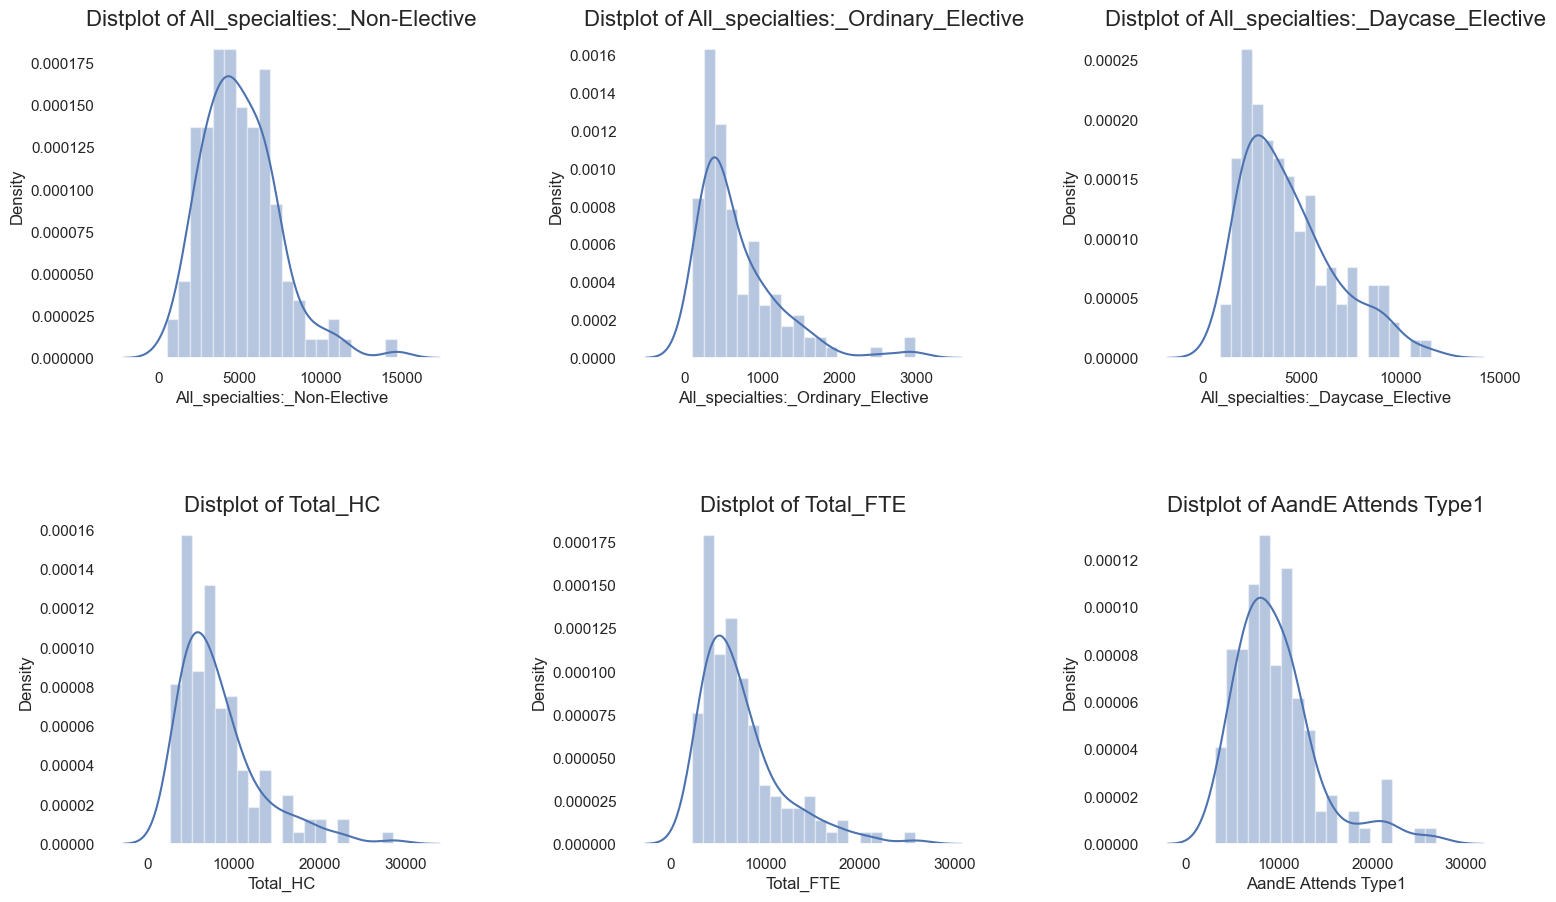

In [180]:
plt.figure(1, figsize=(16, 10))
n = 0
for x in features[2:]:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x), fontsize=16)
plt.show()


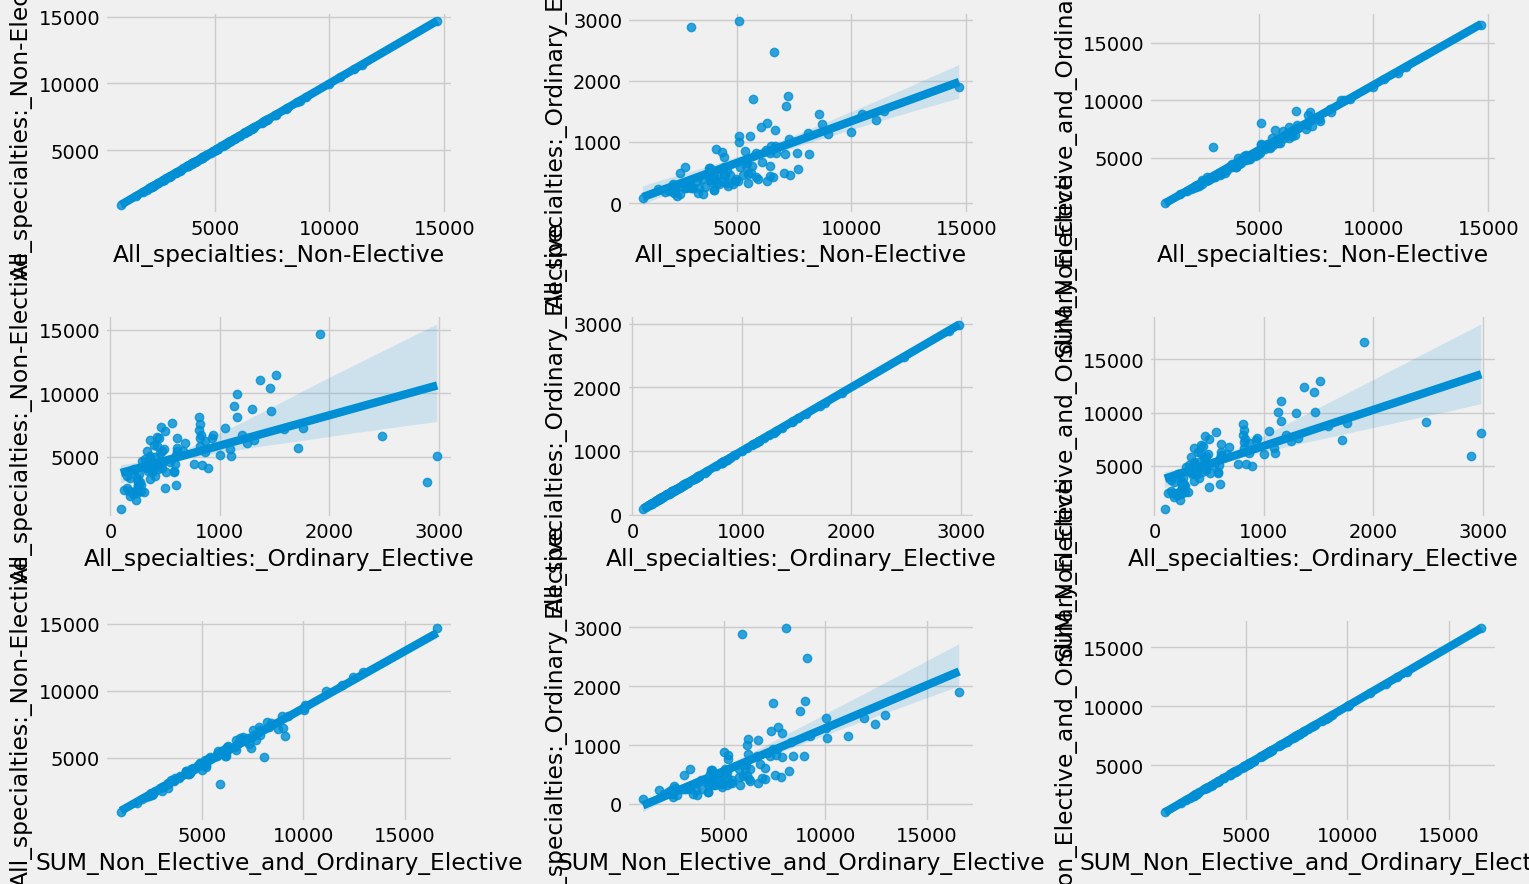

In [19]:
plt.figure(1, figsize=(16, 10))
n = 0
for x in features[0:3]:
    for y in features[0:3]:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()


In [29]:
df.columns


Index(['Org_Code', 'Effective_Snapshot_Date', 'All_specialties:_Non-Elective',
       'All_specialties:_Ordinary_Elective',
       'SUM_Non_Elective_and_Ordinary_Elective',
       'All_specialties:_Daycase_Elective', 'Total_HC', 'Total_FTE'],
      dtype='object')

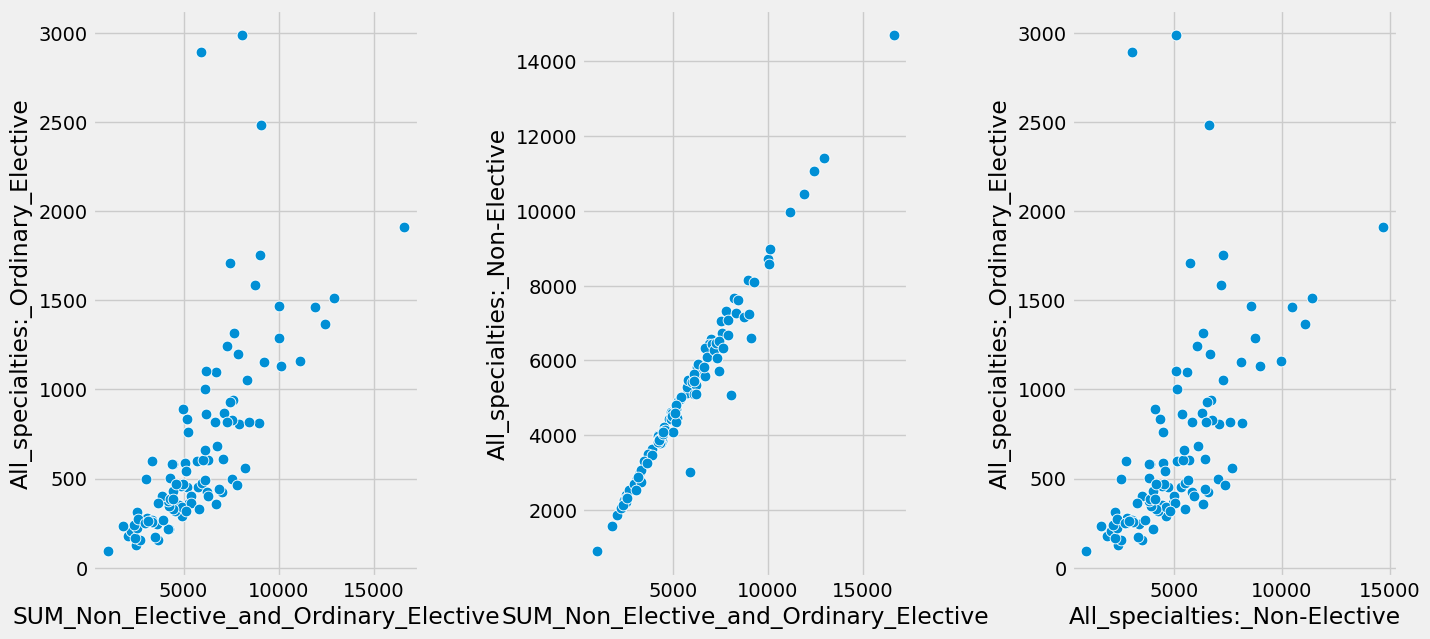

In [20]:
plt.figure(1, figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.scatterplot(
    data=df,
    x='SUM_Non_Elective_and_Ordinary_Elective',
    y='All_specialties:_Ordinary_Elective',
    s=60,
)

plt.subplot(1, 3, 2)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.scatterplot(
    data=df,
    x='SUM_Non_Elective_and_Ordinary_Elective',
    y='All_specialties:_Non-Elective',
    s=60,
)

plt.subplot(1, 3, 3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.scatterplot(
    data=df,
    x='All_specialties:_Non-Elective',
    y='All_specialties:_Ordinary_Elective',
    s=60,
)

plt.show()


## Clustering using K- means

### 1.Segmentation with out sum


In [49]:

X1 = df[features[1:]].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                        tol=0.0001,  random_state=111, algorithm='elkan'))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)


### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)


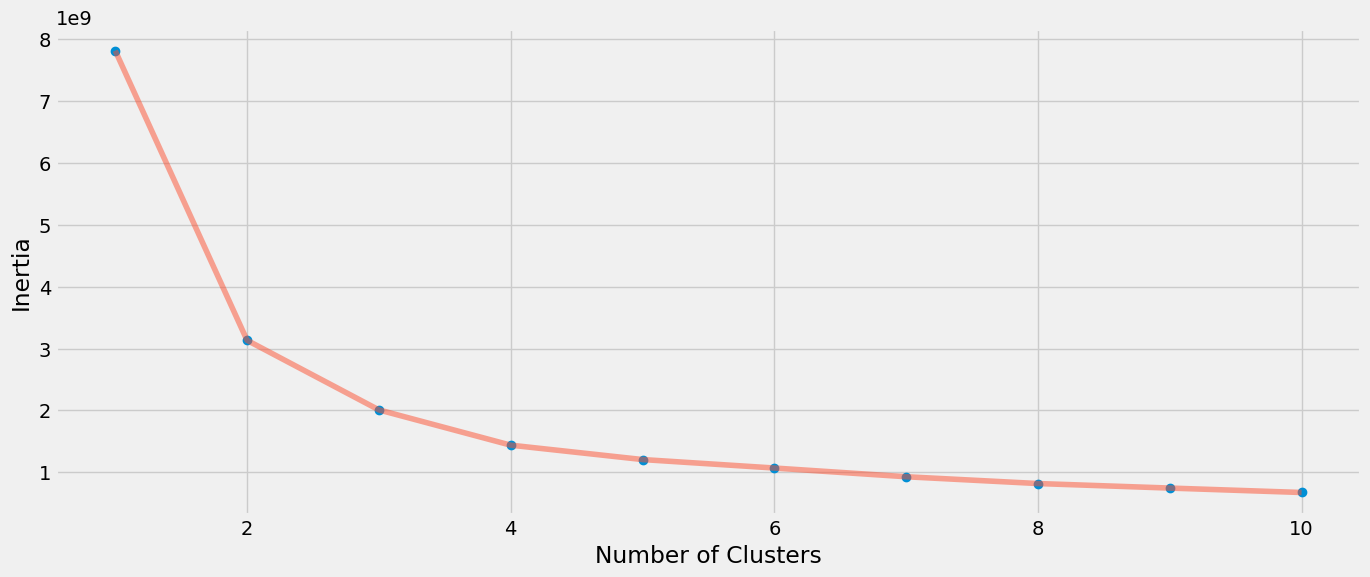

In [22]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()


In [24]:
algorithm = (KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=1000,
                    tol=0.0001,  random_state=111, algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


In [40]:
labels1


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 2. Segmentation using sum


In [181]:
'''Annual Income and spending Score'''
X2 = df[features[1:]].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                        tol=0.0001,  random_state=111, algorithm='elkan'))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)


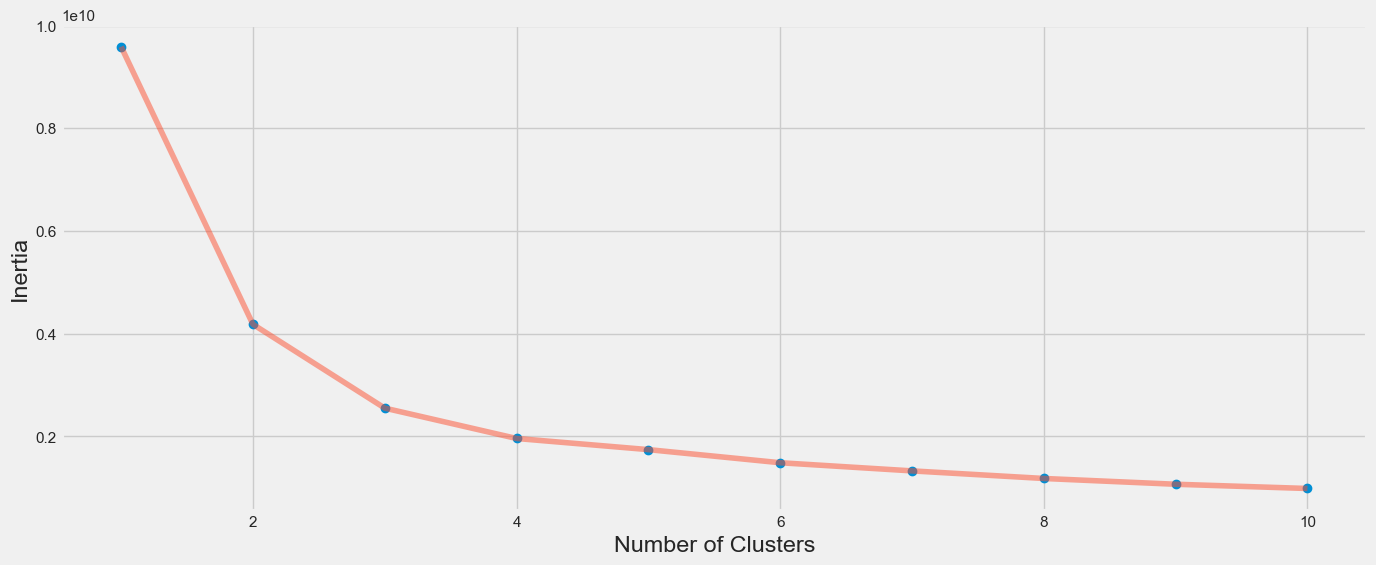

In [184]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()


In [185]:
algorithm = (KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=1000,
                    tol=0.0001,  random_state=111, algorithm='elkan'))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_


In [186]:
# df["label_without_sum"] = labels1
df["label"] = labels2

# df["label_without_sum_categorical"] = np.core.defchararray.add(
#     'grp_', labels1.astype(str))
df["label_categorical"] = np.core.defchararray.add(
    'Cluster_', labels2.astype(str))


In [187]:
# df[["label_without_sum_categorical", "label_with_sum_categorical"]].describe()
df[["label_categorical"]].describe()


,label_categorical
count,123
unique,4
top,Cluster_3
freq,53


In [188]:
df.to_csv("Clustering_Results_A&E_type_1_with_org_code.csv")


In [67]:
df.head()


,SUM_Non_Elective_and_Ordinary_Elective,All_specialties:_Non-Elective,All_specialties:_Ordinary_Elective,All_specialties:_Daycase_Elective,Total_HC,Total_FTE,Total AandE Attends,label_with_sum,label_with_sum_categorical
0,710.0,495.0,215.0,950.0,1104,935.20,1287.0,1,grp_1
1,8005.0,7170.0,835.0,5415.0,8246,7486.10,20963.0,0,grp_0
2,4765.0,3760.0,1005.0,6210.0,11743,10853.61,14693.0,3,grp_3
3,40.0,40.0,0.0,0.0,1287,1091.21,4565.0,1,grp_1
4,3880.0,3475.0,405.0,5370.0,6534,5845.72,13285.0,3,grp_3


In [169]:
# cluster_counts_wo_sum = df["label_without_sum_categorical"].value_counts(
#     normalize=True) * 100
cluster_counts_sum = df["label_categorical"].value_counts()

# cluster_counts_wo_sum


In [170]:
cluster_counts_sum


label_categorical
Cluster_3    53
Cluster_0    43
Cluster_2    17
Cluster_1    10
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


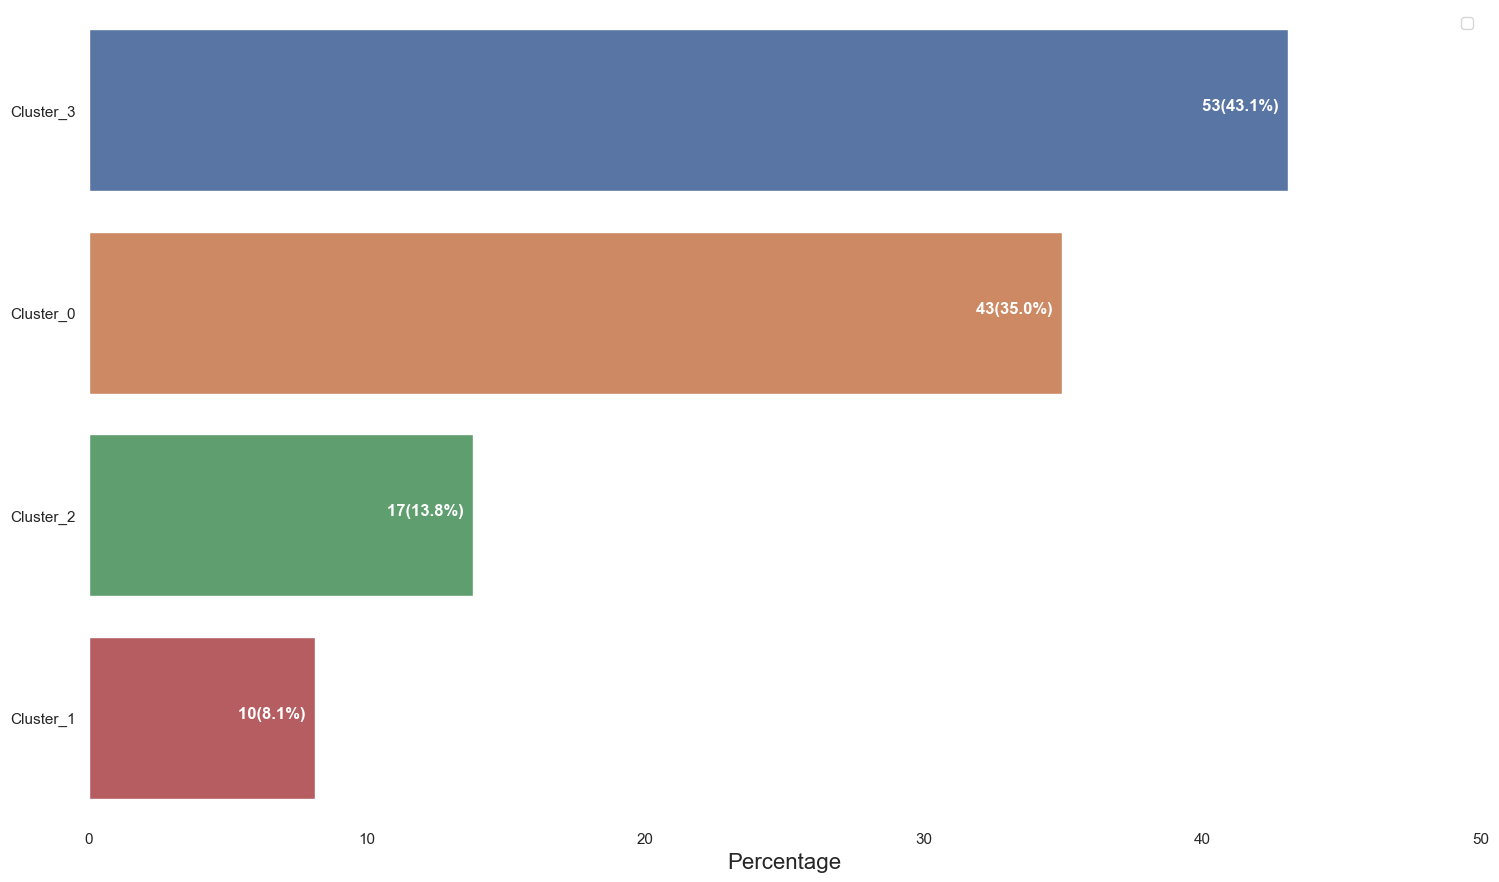

In [189]:
x, y = "label_categorical", "Percentage"

sns.set(rc={'figure.figsize': (16, 10),
             'axes.facecolor': 'none', 'figure.facecolor': 'none'})

plt.grid(False)

data = (df[x]
        .value_counts(normalize=True)*100)
data = data.rename(y).reset_index()

ax = sns.barplot(data=data, x=y, y=x)

plt.ylabel('', fontsize=16)
plt.xlabel('Percentage', fontsize=16)
plt.legend(markerscale=2)
plt.xlim(0,50)

# Add value labels on top of each bar
i=0
for index, row in data.iterrows():
    ax.text(row[y], index, f'{round(cluster_counts_sum[i],0)}({row[y]:.1f}%)  ', color='white', ha="right", fontweight="semibold")
    i+=1

plt.show()

In [ ]:
Org_Code    Clusters 
RC9         Cluster_0
RGT         Cluster_2
RWH         Cluster_0
RDE         Cluster_2
RGP         Cluster_3
RAJ         Cluster_1
RD8         Cluster_3
RM1         Cluster_0
RGN         Cluster_0
RQW         Cluster_3
RCX         Cluster_3
RWG         Cluster_3
RGR         Cluster_3
RF4         Cluster_0
RJN         Cluster_3
R1H         Cluster_1
RLT         Cluster_3

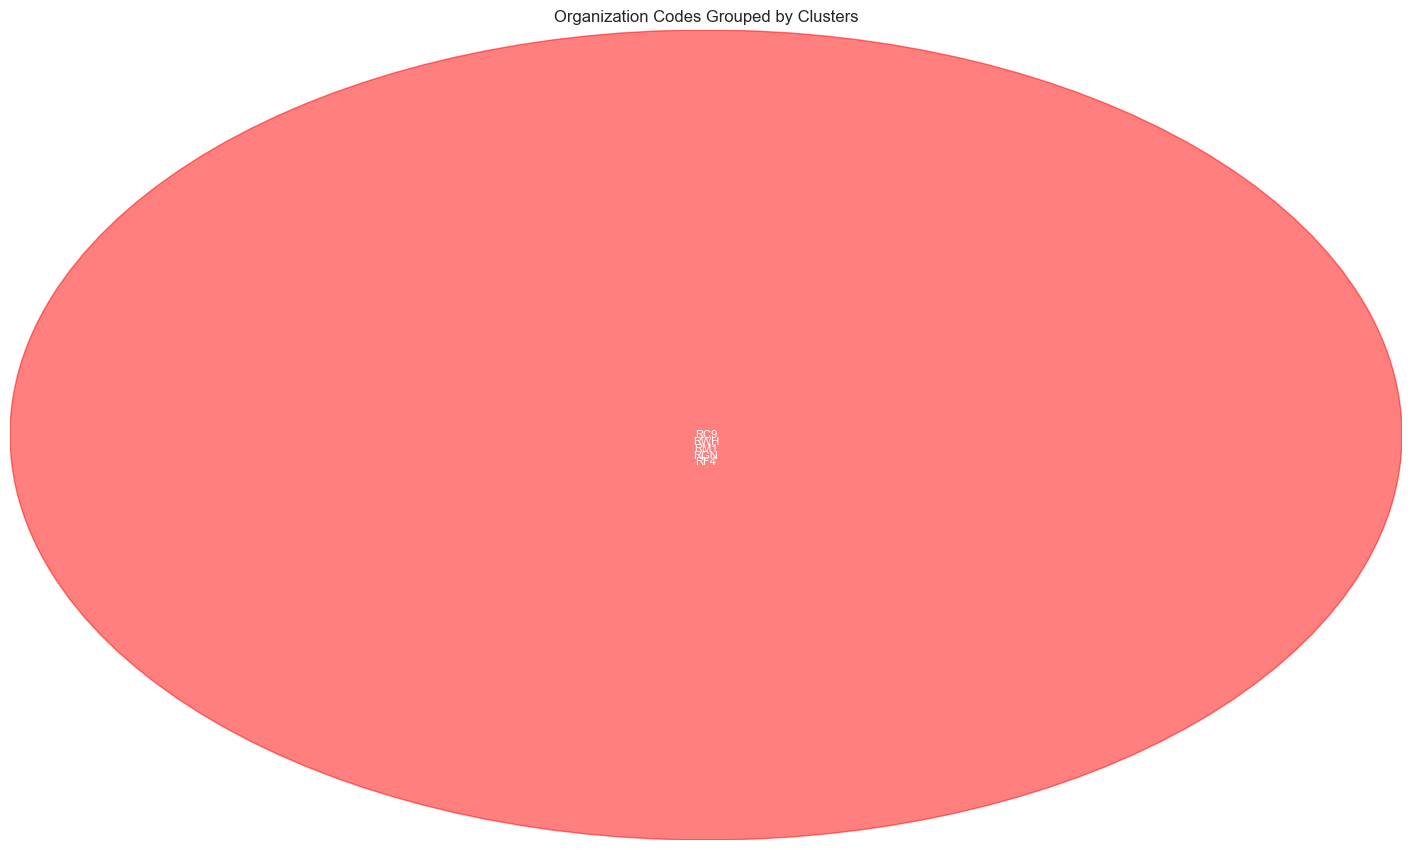

In [205]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.text import Text

# Data
org_codes = ['RC9', 'RGT', 'RWH', 'RDE', 'RGP', 'RAJ', 'RD8', 'RM1', 'RGN', 'RQW', 'RCX', 'RWG', 'RGR', 'RF4', 'RJN', 'R1H', 'RLT']
clusters = ['Cluster_0', 'Cluster_2', 'Cluster_0', 'Cluster_2', 'Cluster_3', 'Cluster_1', 'Cluster_3', 'Cluster_0', 'Cluster_0', 'Cluster_3', 'Cluster_3', 'Cluster_3', 'Cluster_3', 'Cluster_0', 'Cluster_3', 'Cluster_1', 'Cluster_3']

# Group org_codes by clusters
data = {}
for org, cluster in zip(org_codes, clusters):
    if cluster not in data:
        data[cluster] = []
    data[cluster].append(org)

# Define colors for each cluster
colors = {'Cluster_0': 'red', 'Cluster_1': 'blue', 'Cluster_2': 'green', 'Cluster_3': 'orange'}

# Plotting
fig, ax = plt.subplots()

# Draw large circles for each cluster
circle_radius = 3
circle_padding = 1
cluster_centers = {}
for i, cluster in enumerate(data.keys()):
    cluster_centers[cluster] = (i * (circle_radius * 2 + circle_padding), 0)
    circle = Circle(cluster_centers[cluster], radius=circle_radius, color=colors[cluster], alpha=0.5)
    ax.add_patch(circle)

# Add organization codes as text
text_padding = 0.05
for cluster, orgs in data.items():
    center_x, center_y = cluster_centers[cluster]
    for i, org in enumerate(orgs):
        text = Text(center_x, center_y, org, ha='center', va='center', fontsize=8, color='white')
        ax.add_artist(text)
        center_y -= text_padding

# Adjust plot appearance
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.axis('off')
plt.title('Organization Codes Grouped by Clusters')
plt.show()
